# Solution for Logistics Challenge under the Shopee Code League
#### Vee Lee Koh, Chun Hong Khu, Chun Wye Ng & Li Hong Liew
---
This notebook is a sample solution for the Logistics Challenge under the Shopee Code League. The competition was hosted on Kaggle (Link <a href='https://www.kaggle.com/c/open-shopee-code-league-logistic/overview'>here</a>). 


In [5]:
# Import Statements
import pandas as pd
import numpy as np
import datetime as dt

In [6]:
df = pd.read_csv('delivery_orders_march.csv') 
df

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
0,2215676524,1583138397,1.583385e+09,NaN,"Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,c...",Pantranco vill. 417 Warehouse# katipunan 532 (...
1,2219624609,1583309968,1.583463e+09,1.583799e+09,coloma's quzom CASANAS Site1 Masiyan 533A Stol...,"BLDG 210A Moras C42B 2B16,168 church) Complex ..."
2,2220979489,1583306434,1.583460e+09,NaN,"21-O LumangDaan,Capitangan,Abucay,Bataan .Bign...","#66 150-C, DRIVE, Milagros Joe socorro Metro M..."
3,2221066352,1583419016,1.583556e+09,NaN,"616Espiritu MARTINVILLE,MANUYO #5paraiso kengi...","999maII 201,26 Villaruel Barretto gen.t number..."
4,2222478803,1583318305,1.583480e+09,NaN,L042 Summerbreezee1 L2(Balanay analyn Lot760 C...,G66MANILA Hiyas Fitness MAYSILO magdiwang Lt.4...
...,...,...,...,...,...,...
3176308,31504087640510,1585821728,1.585978e+09,NaN,"mayapis. edeliza JC274 5542 brgy.Dita, Metro M...",Intimate St) compound. Sekiat 2B8 98-B Mel far...
3176309,31504147352227,1585895011,1.586179e+09,1.586232e+09,"Superdome PORKY K307 Libertad, PCGCC sub.bagui...","13th 3616 Pilipinas, :1v26 1f-5 (Village) bl10..."
3176310,31504462290482,1585826951,1.585965e+09,NaN,Galay's 1republic 333-18 Diliman 74d Malbay fe...,"Lane, 379B 1739A Ivc AFPFC Cainta, Waterpark, ..."
3176311,31504851495943,1585891194,1.586230e+09,NaN,"#4560, 80south biloca vi!!age KM21, MANRESA, ,...",lrt-2 Consolacion 224-A Paradise 6D 36st champ...


In [8]:
df2 = pd.read_excel('SLA_matrix.xlsx')
df2

,1st Attempt SLA\n(Working Days),Unnamed: 1,Destination (Buyer),Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,Metro Manila,Luzon,Visayas,Mindanao
1,Origin\n(Seller),Metro Manila,3 working days,5 working days,7 working days,7 working days
2,NaN,Luzon,5 working days,5 working days,7 working days,7 working days
3,NaN,Visayas,7 working days,7 working days,7 working days,7 working days
4,NaN,Mindanao,7 working days,7 working days,7 working days,7 working days
5,NaN,NaN,NaN,NaN,NaN,NaN
6,"Working Days are defined as Mon - Sat, Excludi...",NaN,NaN,NaN,NaN,NaN
7,SLA calculation begins from the next day after...,NaN,NaN,NaN,NaN,NaN
8,2nd Attempt must be no later than 3 working da...,NaN,NaN,NaN,NaN,NaN


In [9]:
df.dtypes

orderid                  int64
pick                     int64
1st_deliver_attempt    float64
2nd_deliver_attempt    float64
buyeraddress            object
selleraddress           object
dtype: object

In [10]:
df.orderid.nunique()

3176313

All orderids are unique

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
orderid,3176313.0,4.639170e+12,1.104981e+13,2.195010e+09,2.266298e+09,2.299981e+09,2.337305e+09,3.150713e+13
pick,3176313.0,1.584157e+09,6.704572e+05,1.583079e+09,1.583579e+09,1.584092e+09,1.584512e+09,1.586181e+09
1st_deliver_attempt,3176313.0,1.584533e+09,7.416932e+05,1.583132e+09,1.583982e+09,1.584424e+09,1.584939e+09,1.586268e+09
2nd_deliver_attempt,1357002.0,1.584725e+09,6.072972e+05,1.583251e+09,1.584518e+09,1.584527e+09,1.585008e+09,1.586287e+09


Not all orderids have a 2nd delivery attempt

## Service Level Agreements (SLA) Retrieval

In [12]:
# Retrieve seller and buyer locations 
df['buyer_location'] = df.buyeraddress.apply(lambda x : x.split()[-1].lower())
df['seller_location'] = df.selleraddress.apply(lambda x : x.split()[-1].lower())

In [13]:
df.seller_location.value_counts()

manila    3176312
luzon           1
Name: seller_location, dtype: int64

Only 1 seller location is Luzon > Manually assign SLA to simplify process 

In [14]:
df.buyer_location.value_counts()

manila      1560698
luzon        804888
visayas      479595
mindanao     331132
Name: buyer_location, dtype: int64

In [15]:
df[df.seller_location == 'luzon']

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,buyer_location,seller_location
2300637,30722935142905,1584931603,1.585366e+09,NaN,"jabson PIPAC 676B kingsbird humay-humay, Veto ...","Sangandaan Cor.P. 9F, Fairview. Sogo 1P16 Lloy...",luzon,luzon


Luzon to Luzon > SLA is 5 working days 

In [16]:
df.loc[df.seller_location=='luzon', 'sla']=5

Assign the rest of the SLA based on buyer location

In [17]:
df.loc[(df.seller_location=='manila') & ((df.buyer_location=='mindanao') | (df.buyer_location=='visayas')), 'sla'] = 7

In [18]:
df.loc[(df.seller_location=='manila') & (df.buyer_location=='luzon'), 'sla'] = 5

In [19]:
df.loc[(df.seller_location=='manila') & (df.buyer_location=='manila'), 'sla'] = 3

In [20]:
# Manually check if sla correctly assigned based on value count of buyer locations above
df.sla.value_counts()

3.0    1560698
7.0     810727
5.0     804888
Name: sla, dtype: int64

In [21]:
df.drop(columns = ['buyeraddress','selleraddress'], inplace=True)

In [22]:
df.head()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyer_location,seller_location,sla
0,2215676524,1583138397,1.583385e+09,NaN,manila,manila,3.0
1,2219624609,1583309968,1.583463e+09,1.583799e+09,manila,manila,3.0
2,2220979489,1583306434,1.583460e+09,NaN,manila,manila,3.0
3,2221066352,1583419016,1.583556e+09,NaN,manila,manila,3.0
4,2222478803,1583318305,1.583480e+09,NaN,luzon,manila,5.0


## Datetime Formatting

In [23]:
# Convert epoch time in seconds to datetime 
df['pickup'] = pd.to_datetime(df.pick, unit='s') 
df['first_deli'] = pd.to_datetime(df['1st_deliver_attempt'], unit='s') 
df['second_deli'] = pd.to_datetime(df['2nd_deliver_attempt'], unit='s') 

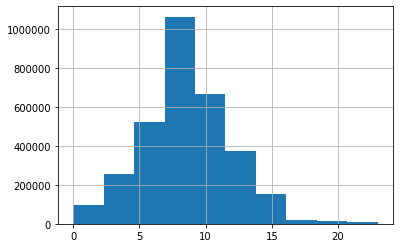

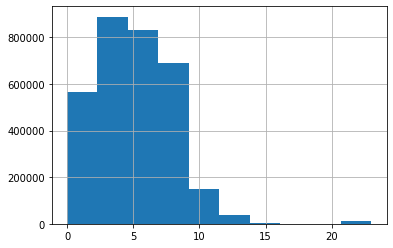

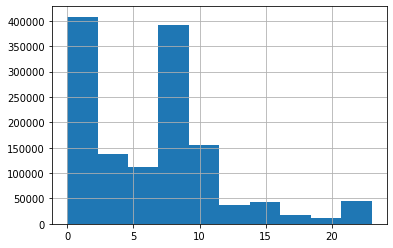

In [24]:
# View distribution of pickup and delivery times
df['pickup'].dt.hour.hist()
plt.show()
df['first_deli'].dt.hour.hist()
plt.show()
df['second_deli'].dt.hour.hist()
# plt.xticks(rotation=30)

Looks like a lot of the delivery times are during midnight. Question statement says "*All time formats are stored in epoch time based on Local Time (GMT+8)*". **This could mean we have to manually add 8 hours to the local time**.

In [25]:
for col in ['pickup','first_deli','second_deli']:
  df[col] = df[col] + pd.to_timedelta(8, unit='h') 

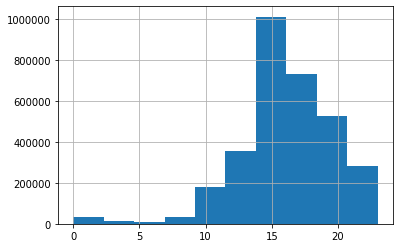

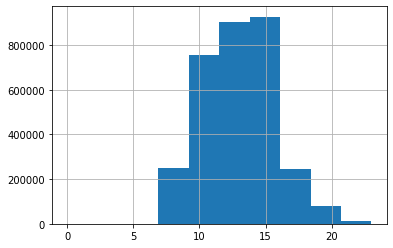

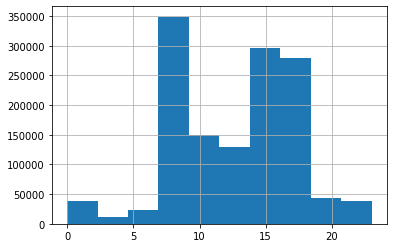

In [26]:
# View distribution of pickup and delivery times
df['pickup'].dt.hour.hist()
plt.show()
df['first_deli'].dt.hour.hist()
plt.show()
df['second_deli'].dt.hour.hist()
# plt.xticks(rotation=30)

The distribution makes more sense now

In [28]:
df.dtypes

orderid                         int64
pick                            int64
1st_deliver_attempt           float64
2nd_deliver_attempt           float64
buyer_location                 object
seller_location                object
sla                           float64
pickup                 datetime64[ns]
first_deli             datetime64[ns]
second_deli            datetime64[ns]
dtype: object

In [29]:
df[['pickup','first_deli','second_deli']].describe()

,pickup,first_deli,second_deli
count,3176313,3176313,1357002
unique,236418,876961,529216
top,2020-03-04 20:28:23,2020-04-07 18:22:30,2020-03-20 03:05:03
freq,528,77,143
first,2020-03-02 00:12:23,2020-03-02 14:45:45,2020-03-04 00:01:45
last,2020-04-06 21:57:09,2020-04-07 21:52:18,2020-04-08 03:11:09


Keep in mind second delivery date column has null values

## Calculate delivery time excluding public holidays and Sundays

In [30]:
# Specify holidays (stated in problem statement)
Holidays = [
    "2020-03-08",
    "2020-03-25",
    "2020-03-30",
    "2020-03-31"
]

In [31]:
# Use numpy built-in function busyday_count to compute first delivery time  
# Need to convert datetime values from datetime64[ns] to datetime64[D] to avoid errors

df['first_delta'] = np.busday_count(
        df.pickup.values.astype('datetime64[D]'),
        df.first_deli.values.astype('datetime64[D]'),
        weekmask="1111110", # sunday is not working day
        holidays=Holidays
    )

In [32]:
df.first_delta.value_counts()

2     1004958
3      631824
4      387945
1      346224
5      258857
6      198729
7      124060
8       76819
9       48728
10      33421
11      22302
12      16435
13      10885
14       6053
15       3877
16       2079
17        991
0         709
18        552
19        322
20        174
21        159
22         98
23         57
24         30
25         16
26          9
Name: first_delta, dtype: int64

In [33]:
# Second delivery column has null values --> need to filter out null values
notnulldates = df.second_deli.notna()

In [34]:
# Compute second delivery time after filtering out null values

second_delta = np.busday_count(
        df.first_deli[notnulldates].values.astype('datetime64[D]'),
        df.second_deli[notnulldates].values.astype('datetime64[D]'),
        weekmask="1111110", # sunday is not working day
        holidays=Holidays
    )

In [35]:
# Create a column for second delta in initial dataframe with null values
df['second_delta'] = np.nan

In [36]:
# Update second_delta column with deltas for rows with non-null dates  
df.loc[notnulldates, 'second_delta'] = second_delta

In [37]:
df.second_delta.value_counts()

1.0     464385
3.0     327436
2.0     219552
4.0     212722
5.0      58787
6.0      36644
7.0      29232
8.0       4363
9.0       1203
10.0       700
11.0       504
12.0       363
13.0       218
14.0       216
15.0       178
16.0       123
17.0       100
18.0        79
19.0        75
21.0        39
20.0        38
22.0        26
23.0        10
24.0         7
26.0         1
25.0         1
Name: second_delta, dtype: int64

In [38]:
df.second_delta.notna().sum()

1357002

## Compare delivery times with SLA to identify late deliveries

In [39]:
df.head()

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyer_location,seller_location,sla,pickup,first_deli,second_deli,first_delta,second_delta
0,2215676524,1583138397,1.583385e+09,NaN,manila,manila,3.0,2020-03-02 16:39:57,2020-03-05 13:09:18,NaT,3,NaN
1,2219624609,1583309968,1.583463e+09,1.583799e+09,manila,manila,3.0,2020-03-04 16:19:28,2020-03-06 10:53:56,2020-03-10 08:02:56,2,3.0
2,2220979489,1583306434,1.583460e+09,NaN,manila,manila,3.0,2020-03-04 15:20:34,2020-03-06 09:56:19,NaT,2,NaN
3,2221066352,1583419016,1.583556e+09,NaN,manila,manila,3.0,2020-03-05 22:36:56,2020-03-07 12:45:41,NaT,2,NaN
4,2222478803,1583318305,1.583480e+09,NaN,luzon,manila,5.0,2020-03-04 18:38:25,2020-03-06 15:41:40,NaT,2,NaN


In [40]:
# Delivery is late when first delivery is longer than SLA or when second delivery is more than 3 days  
df['is_late'] = (df.first_delta > df.sla) | (df.second_delta > 3)

In [41]:
# Convert booleans to 1 and 0
df['is_late'] = df['is_late'].astype('int')

In [42]:
df['is_late'].value_counts()

0    2413891
1     762422
Name: is_late, dtype: int64

There are 762,422 late orders!

## Prepare submission file 

In [43]:
df[["orderid", "is_late"]].to_csv('solution.csv', index=False, header=True)